In [1]:
from google.colab import files
uploaded = files.upload()

Saving ALLtrainMescla5D.csv to ALLtrainMescla5D.csv


In [2]:
import io
import pandas as pd 
df2 = pd.read_csv(io.BytesIO(uploaded['ALLtrainMescla5D.csv']))
#df_test = pd.read_csv(io.BytesIO(uploaded['ALLtestMescla5D.csv']))

In [3]:
df2.head()

,machineID,datetime,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,voltmean_5d,rotatemean_5d,pressuremean_5d,vibrationmean_5d,voltsd_5d,rotatesd_5d,pressuresd_5d,vibrationsd_5d,error1,error2,error3,error4,error5,comp1,comp2,comp3,comp4,model,age,DI,RULWeek,failure,failed,RUL,RUL_I
0,1,2015-01-06,2,171.025033,454.614348,102.377665,41.506930,17.623759,43.648283,8.540959,4.298246,171.698774,452.843541,100.529177,44.874649,1.879874,5.011519,2.141369,5.217156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,model3,18,2.663840,1.0,none,0,1.0,59.0
1,1,2015-01-07,3,174.139410,444.337772,96.674842,41.702771,10.611608,39.450931,10.669844,5.808709,172.567505,452.344562,100.173224,45.360874,1.781676,5.818804,2.658025,4.646503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,model3,18,2.610489,1.0,none,0,2.0,58.0
2,1,2015-01-08,4,172.135931,446.126781,102.097039,39.281983,13.829868,38.445908,9.558219,4.133639,172.622242,449.728970,100.992985,43.602453,1.758648,4.817313,2.442889,5.012262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,model3,18,2.558206,1.0,none,0,3.0,57.0
3,1,2015-01-09,5,169.350052,466.884090,100.128260,38.571482,14.600352,40.676186,8.463613,4.632150,171.533767,453.357148,100.728184,40.878696,1.763873,8.948939,2.452399,1.933709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,model3,18,2.506971,1.0,none,0,4.0,56.0
4,1,2015-01-10,6,171.006246,455.695551,99.680231,39.789390,12.461183,33.019600,9.178725,5.427788,171.531334,453.531708,100.191607,40.170511,1.764769,8.993078,2.293615,1.380712,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,model3,18,2.456761,1.0,none,0,5.0,55.0


In [4]:

from pandas import DataFrame
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from sklearn.preprocessing import MinMaxScaler

In [5]:
df2.dtypes

machineID              int64
datetime              object
time_in_cycles         int64
voltmean_24h         float64
rotatemean_24h       float64
pressuremean_24h     float64
vibrationmean_24h    float64
voltsd_24h           float64
rotatesd_24h         float64
pressuresd_24h       float64
vibrationsd_24h      float64
voltmean_5d          float64
rotatemean_5d        float64
pressuremean_5d      float64
vibrationmean_5d     float64
voltsd_5d            float64
rotatesd_5d          float64
pressuresd_5d        float64
vibrationsd_5d       float64
error1               float64
error2               float64
error3               float64
error4               float64
error5               float64
comp1                float64
comp2                float64
comp3                float64
comp4                float64
model                 object
age                    int64
DI                   float64
RULWeek              float64
failure               object
failed                 int64
RUL           

In [6]:
max_cycle_data = df2.groupby(['machineID'], sort=False)['time_in_cycles'].max().reset_index().rename(columns={'time_in_cycles':'MaxCycleID'})
max_cycle_data

,machineID,MaxCycleID
0,1,346
1,2,360
2,3,333
3,4,283
4,5,275
...,...,...
93,96,239
94,97,321
95,98,328
96,99,329


In [7]:
merge_data = pd.merge(df2, max_cycle_data, how='inner', on='machineID')
merge_data['RUL'] = merge_data['MaxCycleID']-merge_data['time_in_cycles']
merge_data[['time_in_cycles','RUL']]

,time_in_cycles,RUL
0,2,344
1,3,343
2,4,342
3,5,341
4,6,340
...,...,...
20862,335,4
20863,336,3
20864,337,2
20865,338,1


In [8]:
list(merge_data)

['machineID',
 'datetime',
 'time_in_cycles',
 'voltmean_24h',
 'rotatemean_24h',
 'pressuremean_24h',
 'vibrationmean_24h',
 'voltsd_24h',
 'rotatesd_24h',
 'pressuresd_24h',
 'vibrationsd_24h',
 'voltmean_5d',
 'rotatemean_5d',
 'pressuremean_5d',
 'vibrationmean_5d',
 'voltsd_5d',
 'rotatesd_5d',
 'pressuresd_5d',
 'vibrationsd_5d',
 'error1',
 'error2',
 'error3',
 'error4',
 'error5',
 'comp1',
 'comp2',
 'comp3',
 'comp4',
 'model',
 'age',
 'DI',
 'RULWeek',
 'failure',
 'failed',
 'RUL',
 'RUL_I',
 'MaxCycleID']

In [9]:
len(merge_data[merge_data['RUL'] == 0])

98

In [10]:
len(merge_data['machineID'].unique())

98

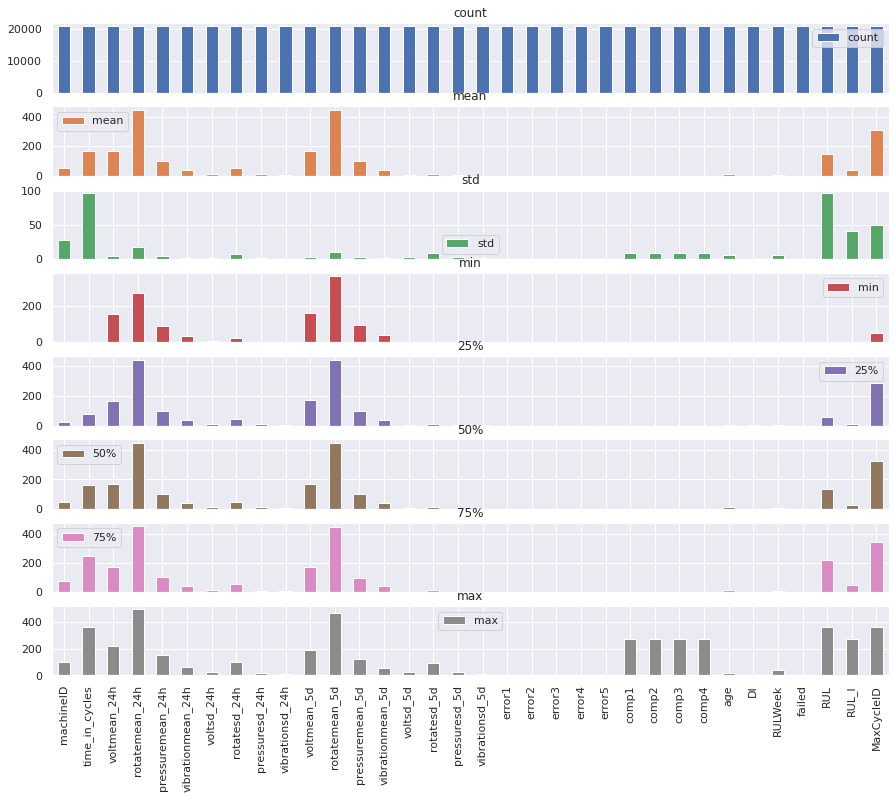

In [11]:
axes = merge_data.describe().T.plot.bar(subplots=True, figsize=(15,12))

In [12]:
constant_col = [ col for col in merge_data.columns if len(merge_data[col].unique()) <= 3 ]
print('Columns with constant values: \n' + str(constant_col) + '\n')

Columns with constant values: 
['error1', 'error2', 'error3', 'error4', 'error5', 'failed']



In [13]:
info_cols = ['machineID','time_in_cycles', 'RUL']
sensor_cols = ['voltmean_24h','rotatemean_24h','pressuremean_24h','vibrationmean_24h','voltsd_24h','rotatesd_24h','pressuresd_24h','vibrationsd_24h','voltmean_5d','rotatemean_5d',
               'pressuremean_5d','vibrationmean_5d','voltsd_5d','rotatesd_5d','pressuresd_5d','vibrationsd_5d','error1','error2','error3','error4','error5','comp1','comp2','comp3',
               'comp4','model','age','DI','RULWeek','failure','failed', 'MaxCycleID']

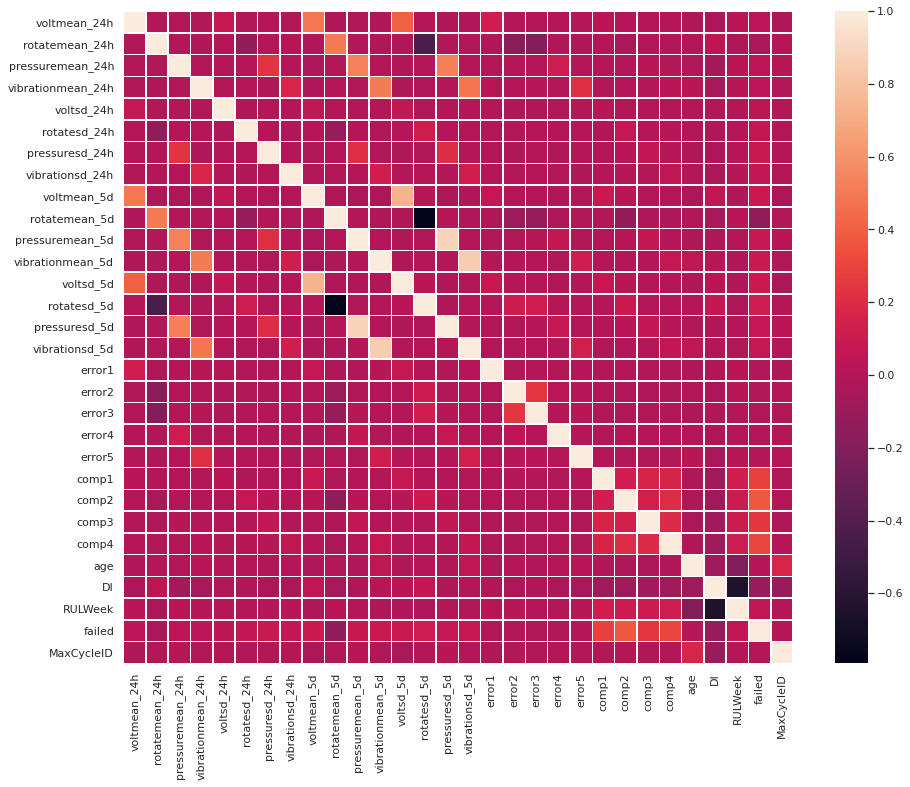

In [14]:
data_corr = merge_data[ sensor_cols].corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(data_corr, linewidths=.5)

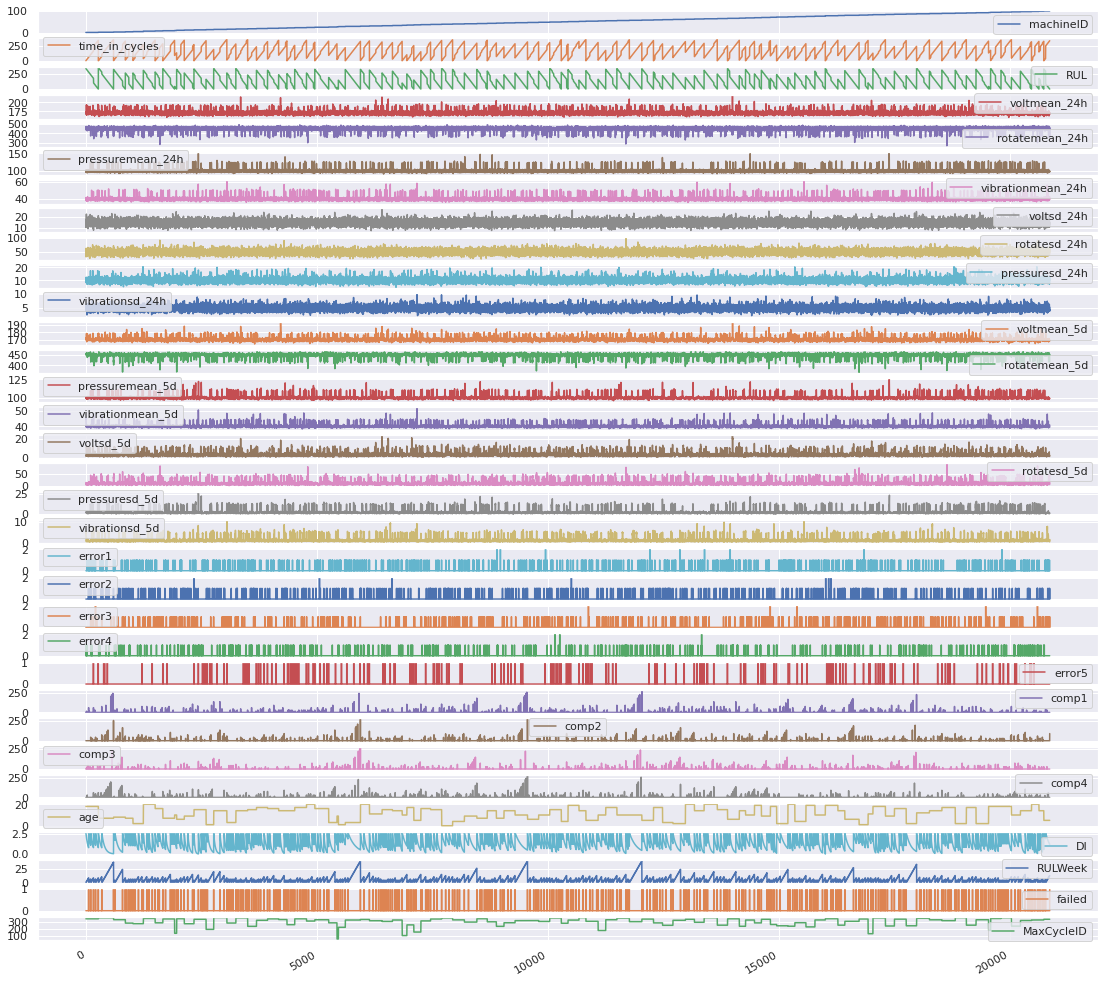

In [15]:
check_Data = merge_data[info_cols + sensor_cols].plot(subplots=True, figsize=(19, 19))

In [16]:
machine_series_length = merge_data.groupby(['machineID'], sort=False)['time_in_cycles'].max().sort_values()
shortest_machine = machine_series_length.index[0]
longest_machine = machine_series_length.index[-1]

print("The machine with the shortest cycles is no. {} with {} cycles lifetime and the one with the longest cycles run is no. {} running {} cycles.".\
      format(shortest_machine, machine_series_length.iloc[0], longest_machine, machine_series_length.iloc[-1]))

The machine with the shortest cycles is no. 27 with 51 cycles lifetime and the one with the longest cycles run is no. 15 running 363 cycles.


In [17]:
Train_Data = merge_data[['machineID','time_in_cycles','voltmean_24h','rotatemean_24h','pressuremean_24h','vibrationmean_24h','voltsd_24h','rotatesd_24h','pressuresd_24h','vibrationsd_24h','voltmean_5d','rotatemean_5d',
              'pressuremean_5d','vibrationmean_5d','voltsd_5d','rotatesd_5d','pressuresd_5d','vibrationsd_5d',
            'age','DI','RUL']]

In [18]:
Train_Data_copy = Train_Data.copy()
Period = 30
Train_Data_copy['fail_label'] = Train_Data_copy['RUL'].apply(lambda x: 1 if x <= Period else 0) 
Train_Data_copy.head(10)

,machineID,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,voltmean_5d,rotatemean_5d,pressuremean_5d,vibrationmean_5d,voltsd_5d,rotatesd_5d,pressuresd_5d,vibrationsd_5d,age,DI,RUL,fail_label
0,1,2,171.025033,454.614348,102.377665,41.506930,17.623759,43.648283,8.540959,4.298246,171.698774,452.843541,100.529177,44.874649,1.879874,5.011519,2.141369,5.217156,18,2.663840,344,0
1,1,3,174.139410,444.337772,96.674842,41.702771,10.611608,39.450931,10.669844,5.808709,172.567505,452.344562,100.173224,45.360874,1.781676,5.818804,2.658025,4.646503,18,2.610489,343,0
2,1,4,172.135931,446.126781,102.097039,39.281983,13.829868,38.445908,9.558219,4.133639,172.622242,449.728970,100.992985,43.602453,1.758648,4.817313,2.442889,5.012262,18,2.558206,342,0
3,1,5,169.350052,466.884090,100.128260,38.571482,14.600352,40.676186,8.463613,4.632150,171.533767,453.357148,100.728184,40.878696,1.763873,8.948939,2.452399,1.933709,18,2.506971,341,0
4,1,6,171.006246,455.695551,99.680231,39.789390,12.461183,33.019600,9.178725,5.427788,171.531334,453.531708,100.191607,40.170511,1.764769,8.993078,2.293615,1.380712,18,2.456761,340,0
5,1,7,167.405610,433.871793,97.453837,41.290737,16.482495,63.585338,10.614349,5.205885,170.807450,449.383197,99.206842,40.127273,2.578898,12.477893,2.174304,1.330884,18,2.407557,339,0
6,1,8,169.234045,445.874333,96.650557,39.437964,17.737875,43.148865,12.390459,4.444062,169.826377,449.690510,99.201985,39.674311,1.814110,12.340734,2.181390,1.006490,18,2.359339,338,0
7,1,9,170.573458,451.978783,102.762072,40.140004,16.790067,59.471178,10.426480,4.157037,169.513882,450.860910,99.334991,39.845915,1.405330,12.194894,2.410305,0.995966,18,2.312086,337,0
8,1,10,167.981092,459.668333,100.772665,40.485997,13.834221,46.189985,9.181121,5.669340,169.240090,449.417758,99.463872,40.228818,1.569045,10.065743,2.479559,0.710677,18,2.265780,336,0
9,1,11,171.307628,471.330450,101.683031,40.000752,16.419036,43.845870,11.935007,5.258277,169.300367,452.544738,99.864432,40.271091,1.657170,14.116852,2.677147,0.683782,18,2.220401,335,0


In [19]:
def generate_sequence(id, seq_len, seq_cols):
    df_zeros=pd.DataFrame(np.zeros((seq_len-1,id.shape[1])),columns=id.columns)
    #print("df zeros",df_zeros)
    id=df_zeros.append(id,ignore_index=True)
    #print("id = ",id)
    data_array = id[seq_cols].values
    #print("data array",data_array)
    num_elements = data_array.shape[0]
    #print("num elemets",num_elements)
    lstm_array=[]
    for start, stop in zip(range(0, num_elements-seq_len), range(seq_len, num_elements)):
        lstm_array.append(data_array[start:stop, :])
    return np.array(lstm_array)

In [20]:
def gen_final_label(id, seq_len, seq_cols,final_label):
    df_zeros=pd.DataFrame(np.zeros((seq_len-1,id.shape[1])),columns=id.columns)
    id=df_zeros.append(id,ignore_index=True)
    data_array = id[seq_cols].values
    num_elements = data_array.shape[0]
    y_label=[]
    for start, stop in zip(range(0, num_elements-seq_len), range(seq_len, num_elements)):
        y_label.append(id[final_label][stop])
    return np.array(y_label)

In [21]:
feature_cols = ['voltmean_24h','rotatemean_24h','pressuremean_24h','vibrationmean_24h',
                'voltsd_24h','rotatesd_24h',
                'pressuresd_24h','vibrationsd_24h','voltmean_5d','rotatemean_5d',
                'pressuremean_5d','vibrationmean_5d','voltsd_5d','rotatesd_5d',
                'pressuresd_5d','vibrationsd_5d','age','DI']

Target_cols = ['fail_label']

In [22]:
Final_train = Train_Data_copy[['machineID','voltmean_24h','rotatemean_24h','pressuremean_24h','vibrationmean_24h','voltsd_24h','rotatesd_24h','pressuresd_24h','vibrationsd_24h','voltmean_5d','rotatemean_5d',
                'pressuremean_5d','vibrationmean_5d','voltsd_5d','rotatesd_5d','pressuresd_5d','vibrationsd_5d','age','DI','fail_label']]

#Y = Train_Data_copy[Target_cols]

In [23]:
seq_len=50
seq_cols=feature_cols

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_data= np.concatenate(list(list(generate_sequence(Train_Data_copy[Final_train['machineID']==id], seq_len, seq_cols)) for id in Final_train['machineID'].unique()))
x_data.shape

(20769, 50, 18)

In [26]:
y_data = np.concatenate(list(list(gen_final_label(Final_train[Final_train['machineID']==id], 50, seq_cols,'fail_label')) for id in Final_train['machineID'].unique()))
y_data.shape

(20769,)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,shuffle=True)

In [28]:
print("Training set size = ",x_train.shape, y_train.shape)
print("Testing set size = ",x_test.shape,y_test.shape)

Training set size =  (16615, 50, 18) (16615,)
Testing set size =  (4154, 50, 18) (4154,)


In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,accuracy_score

In [30]:
nb_features = x_train.shape[2]
timestamp = seq_len
model = Sequential()
 
model.add(LSTM(input_shape = (timestamp, nb_features),units = 50,return_sequences = True))
 
model.add(Dropout(0.4))
 
model.add(LSTM(units = 25,return_sequences = False))
 
model.add(Dropout(0.4))
 
model.add(Dense(units = 1, activation = 'sigmoid'))
 
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
 
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            13800     
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 26        
Total params: 21,426
Trainable params: 21,426
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32,validation_split=0.2, shuffle=True, verbose=1)
          #callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')])

Epoch 1/10
416/416 [==============================] - 5s 11ms/step - loss: 0.4144 - accuracy: 0.8467 - val_loss: 0.3855 - val_accuracy: 0.8562
Epoch 2/10
416/416 [==============================] - 4s 9ms/step - loss: 0.3994 - accuracy: 0.8548 - val_loss: 0.3817 - val_accuracy: 0.8562
Epoch 3/10
416/416 [==============================] - 4s 9ms/step - loss: 0.3980 - accuracy: 0.8548 - val_loss: 0.3874 - val_accuracy: 0.8562
Epoch 4/10
416/416 [==============================] - 4s 9ms/step - loss: 0.3972 - accuracy: 0.8548 - val_loss: 0.3816 - val_accuracy: 0.8562
Epoch 5/10
416/416 [==============================] - 4s 9ms/step - loss: 0.3964 - accuracy: 0.8548 - val_loss: 0.3816 - val_accuracy: 0.8562
Epoch 6/10
416/416 [==============================] - 4s 9ms/step - loss: 0.3946 - accuracy: 0.8548 - val_loss: 0.3815 - val_accuracy: 0.8562
Epoch 7/10
416/416 [==============================] - 4s 9ms/step - loss: 0.3955 - accuracy: 0.8548 - val_loss: 0.3834 - val_accuracy: 0.8562
Epoch

In [ ]:
scores = model.evaluate(x_train, y_train, verbose=1, batch_size=32)
print('Accurracy: {}'.format(scores[1]))

520/520 [==============================] - 2s 4ms/step - loss: 0.3883 - accuracy: 0.8551
Accurracy: 0.8550707101821899


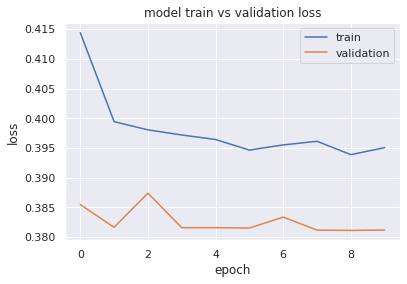

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
y_pred=model.predict_classes(x_test)
print('Accuracy of model on test data: ',accuracy_score(y_test,y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))

Accuracy of model on test data:  0.8524313914299471
Confusion Matrix: 
 [[3541    0]
 [ 613    0]]
